<a href="https://colab.research.google.com/github/vitao-bolado/Trabalho1_AnaliseDados/blob/main/Trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho 1 - Analise de rotatividade de Clientes Bancários**<br>
**Desenvolvido por** José Vinicius e Vitor Faustino<Br>


*   Identicar os fatores que influenciam a saída dos clientes;
*   Comparar o perfil de clientes que saíram com os que permaneceram;
*   Desenvolver modelos preditivos de churn;
*   Trabalhar com variáveis categóricas e numéricas simultaneamente.


**ETAPA 1** - Carregando bibliotecas e base de dados

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive"

df = pd.read_csv(path + '/06_rotatividade_clientes_bancários.csv', sep=',')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ETAPA 2 - Visualizando a base de dados

In [7]:
print(f'A Base possui {df.shape[0]} registros;')
print(f'E há {df.shape[1]} variáveis.')
print(f'\nOs tipos das variaveis são do tipo:\n{df.dtypes}')

df.head(5)

A Base possui 10002 registros;
E há 14 variáveis.

Os tipos das variaveis são do tipo:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


ETAPA 3 - Tratando a base de dados

In [8]:
#Removendo colunas não usadas
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


ETAPA 3.1 - Verificando nulos

In [9]:
# Verificando valores nulos
df.isnull().sum().rename('Quantidade').sort_values(ascending=False)
# Excluindo linhas com valores nulos
df.dropna(inplace=True)

ETAPA 4 - ESTATÍSTICAS INICIAS

In [10]:
cols= [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]
df[cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,650.529606,38.920287,5.013003,76481.490819,1.530206,100099.786455
std,96.633003,10.487986,2.892152,62393.187035,0.581669,57510.939962
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,50983.750000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,100218.210000
75%,718.000000,44.000000,7.000000,127641.417500,2.000000,149395.882500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


ETAPA 5 - Tipo de Distribuição de variaveis

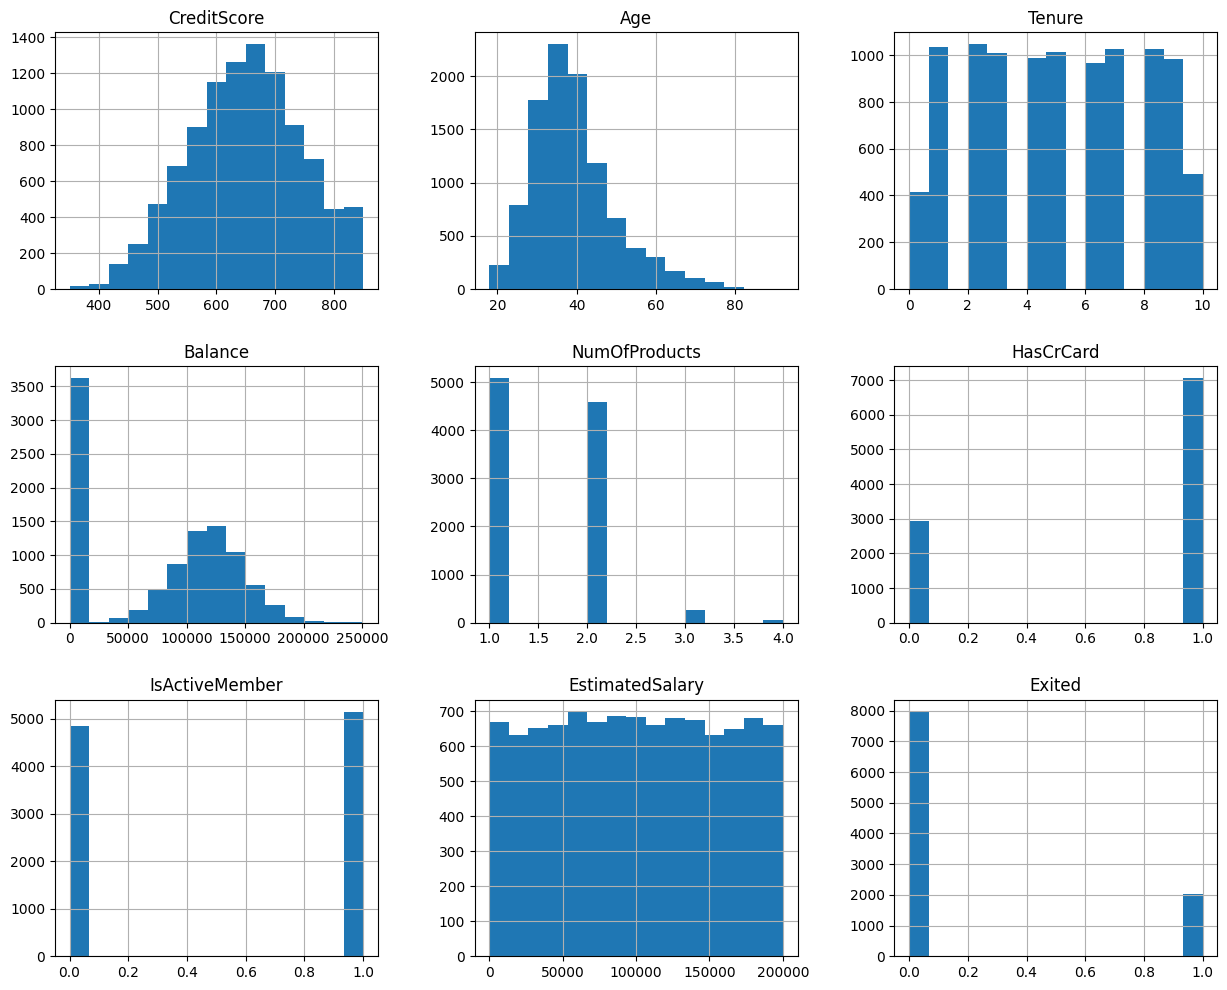

In [11]:
df.hist(bins=15, figsize=(15,12));

ETAPA 6 - Vizualizando Outliers

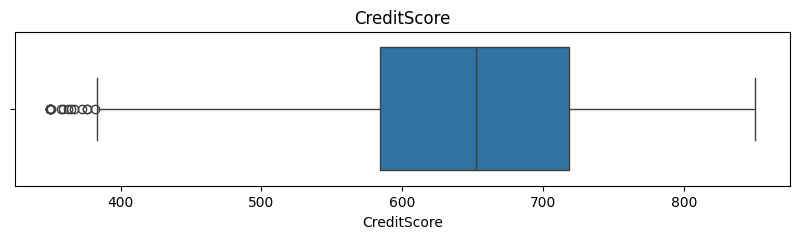

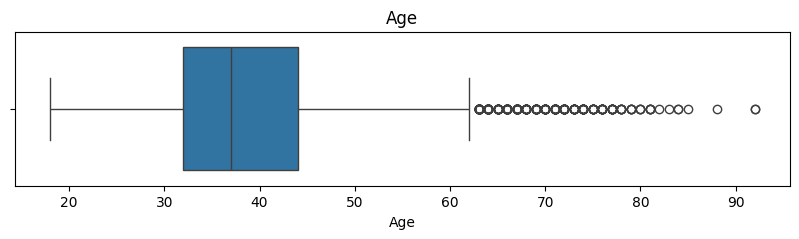

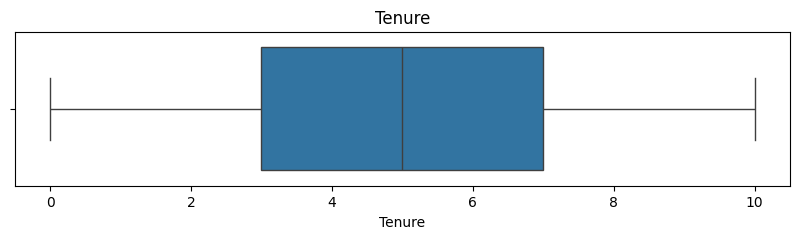

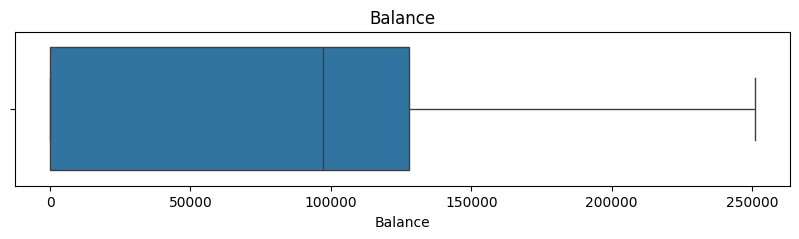

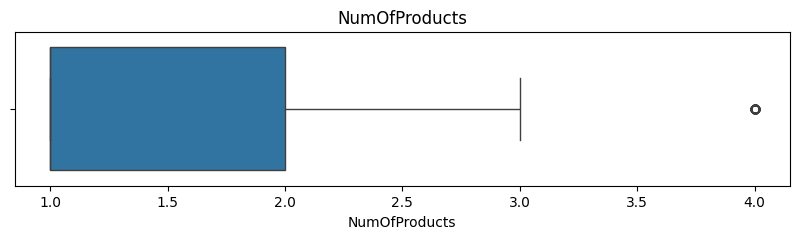

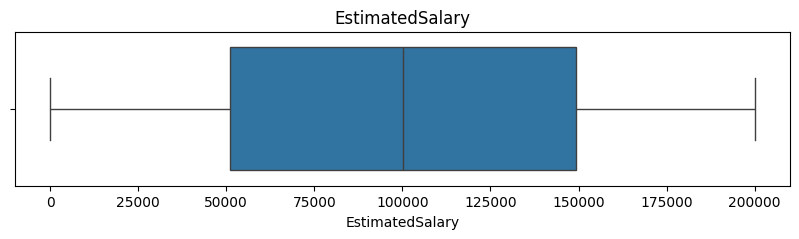

In [12]:
colunas_boxplot = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]

for col in colunas_boxplot:
    plt.figure(figsize=(10,2))
    sns.boxplot(data=df[col], orient='h')
    plt.title(f'{col}')
    plt.show()

ETAPA 7 — Comparação entre clientes que saíram e os que permaneceram

In [19]:
# Criando dois subconjuntos de clientes que saíram (Exited = 1) e que permaneceram (Exited = 0)
saiu = df[df['Exited'] == 1]
ficou = df[df['Exited'] == 0]

# Mostra a média das variáveis numéricas separadas por grupo (Exited)
comparacao = df.groupby('Exited').mean(numeric_only=True)
print("Média das variáveis por grupo (Exited):")
print(comparacao)

Média das variáveis por grupo (Exited):
        CreditScore        Age    Tenure       Balance  NumOfProducts  \
Exited                                                                  
0        651.839447  37.405531  5.033794  72738.539607       1.544221   
1        645.413641  44.836605  4.931796  91100.672198       1.475466   

        HasCrCard  IsActiveMember  EstimatedSalary  
Exited                                              
0        0.707161        0.554271     99751.154690  
1        0.699215        0.360648    101461.468916  


Etapa 7.1 - Boxplots para comparar as variáveis numéricas entre os grupos

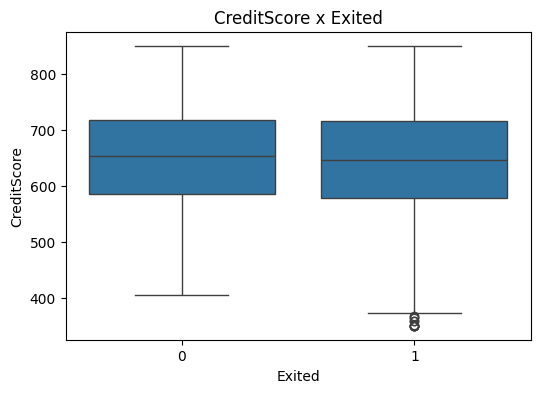

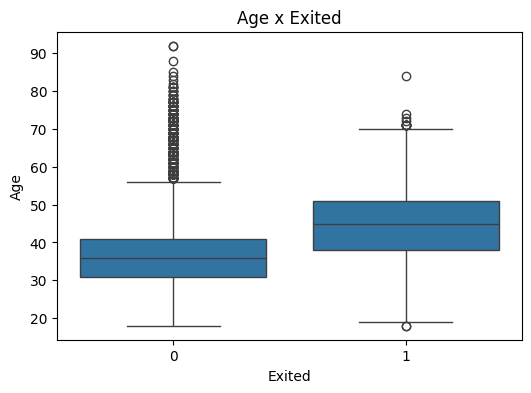

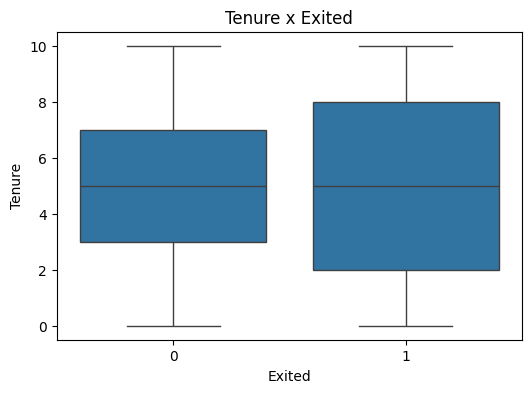

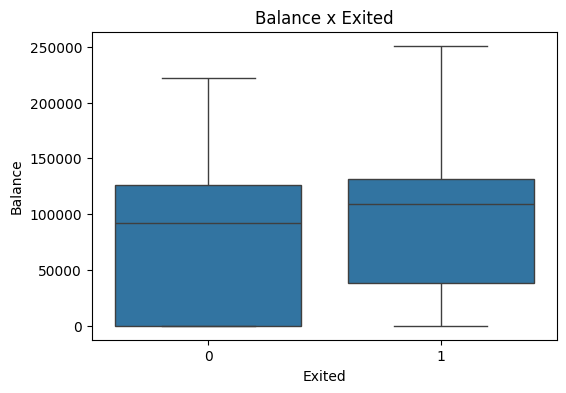

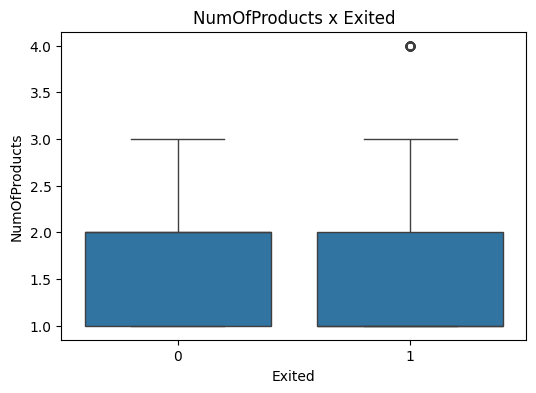

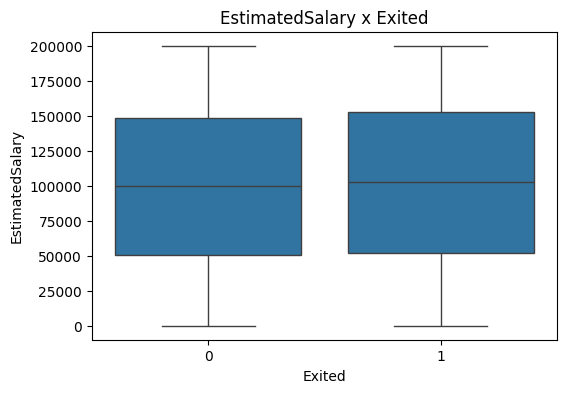

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listando as colunas numéricas que vão ser comparadas
colunas_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Gerando um boxplot para cada variável, separado por "Exited"
for coluna in colunas_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Exited', y=coluna, data=df)
    plt.title(f'{coluna} x Exited')  # Título do gráfico
    plt.show()

Etapa 7.2 - Análise de variáveis categóricas

In [21]:
# Comparando a porcentagem de saída por categoria em 'Gender' e 'Geography'
for col in ['Gender', 'Geography']:
    cruzamento = pd.crosstab(df[col], df['Exited'], normalize='index') * 100
    print(f'\nDistribuição de saída por {col} (%):\n', cruzamento)


Distribuição de saída por Gender (%):
 Exited          0          1
Gender                      
Female  74.928461  25.071539
Male    83.519707  16.480293

Distribuição de saída por Geography (%):
 Exited             0          1
Geography                      
France     83.838787  16.161213
Germany    67.529880  32.470120
Spain      83.319871  16.680129


Etapa 7.3 - Correlação entre as variáveis numéricas e a saída (Exited)

In [22]:
# Elaborando cálculo da correlação entre as variáveis numéricas e a variável de saída
correlacoes = df.corr(numeric_only=True)
print("Correlação com Exited:")
print(correlacoes['Exited'].sort_values(ascending=False))

Correlação com Exited:
Exited             1.000000
Age                0.285448
Balance            0.118564
EstimatedSalary    0.011981
HasCrCard         -0.007023
Tenure            -0.014208
CreditScore       -0.026790
NumOfProducts     -0.047621
IsActiveMember    -0.156072
Name: Exited, dtype: float64
